# 히스토그램
- 영상을 구성하는 픽셀들의 빈도수를 측정하여 그래프(히스토그램)으로 표현
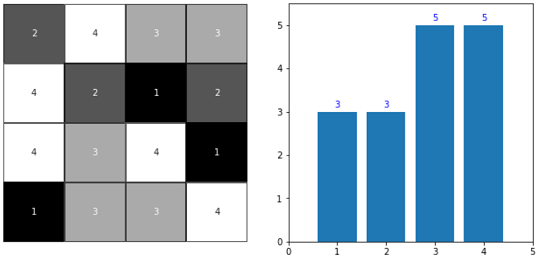

- **`cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)`**
    - images: 히스토그램을 구할 입력영상 리스트
    - channels: 히스토그램을 구할 채널 리스트
    - mask: 마스크 영상. 영상전체일 경우 None지정
    - histSize: 히스토그램 각 채널의 bin의 개수 리스트
    - ranges: 히스토그램 각 채널의 최솟값과 최대값 리스트

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/window.jpg', cv2.IMREAD_GRAYSCALE)
img.shape, 576*869, img.size, img.dtype

((576, 869), 500544, 500544, dtype('uint8'))

In [6]:
cv2.imshow('frame', img)
cv2.waitKey()
cv2.destroyAllWindows()

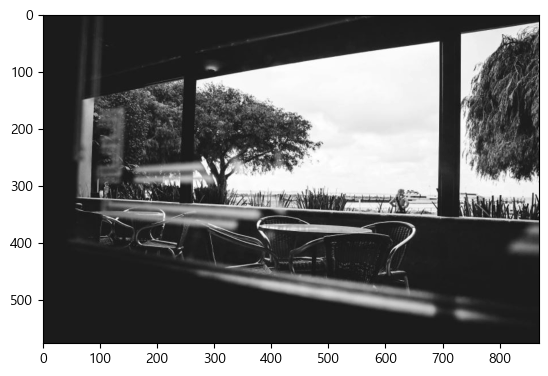

In [8]:
plt.imshow(img, cmap="gray")
plt.show()

In [9]:
hist = cv2.calcHist([img], # historam 계산(그릴) 이미지
                    [0],   # 채널
                    None,  #mask # 일부분만 계산할 경우 지정.
                    [256], # bins(계급수)
                    [0, 256], # 개수를 셀 pixel값의 범위 0<= pixcel < 256
                   )

In [12]:
type(hist), hist.shape   #(256, 1) => 각 계급별 개수

(numpy.ndarray, (256, 1))

In [14]:
hist[:10]
hist[100:110]

array([[1036.],
       [1095.],
       [1003.],
       [1043.],
       [1056.],
       [1034.],
       [ 962.],
       [ 947.],
       [ 944.],
       [1017.]], dtype=float32)

In [15]:
hist.size

256

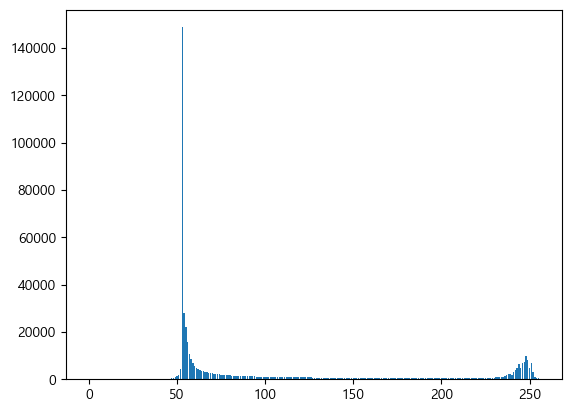

In [17]:
plt.bar(range(hist.size), hist.flatten())
plt.show()

In [18]:
hist[50:60]

array([[  1222.],
       [  1926.],
       [  4540.],
       [148814.],
       [ 28149.],
       [ 22008.],
       [ 15619.],
       [ 10588.],
       [  8699.],
       [  6844.]], dtype=float32)

In [22]:
hist2 = cv2.calcHist([img], # historam 계산(그릴) 이미지
                    [0],   # 채널
                    None,  #mask # 일부분만 계산할 경우 지정.
                    [2], # bins(계급수)
                    [0, 256], # 개수를 셀 pixel값의 범위 0<= pixcel < 256
                   )

In [23]:
hist2

array([[39380.],
       [26636.]], dtype=float32)

In [24]:
# color 영상의 HISTOGRAM => 채널별로 확인
img2 = cv2.imread('images/lenna.bmp')
img2.shape

(512, 512, 3)

In [27]:
# img2[:,:,0], img2[:,:,1], img2[:,:,2]
bgr_channels = cv2.split(img2)  # channel별로 분리
type(bgr_channels), len(bgr_channels)

(tuple, 3)

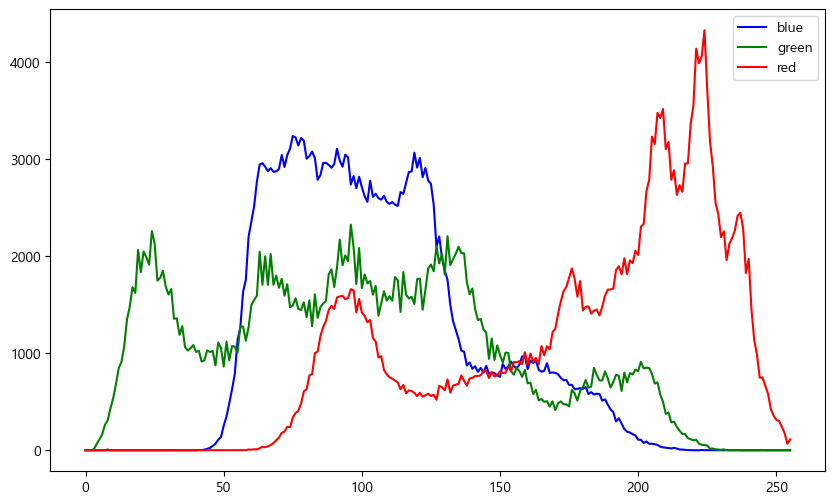

In [29]:
labels = ['blue', 'green', 'red']
plt.figure(figsize=(10, 6))
for label, channel in zip(labels, bgr_channels):
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    plt.plot(range(hist.size), hist.flatten(), color=label, label=label)
plt.legend()
plt.show()

# 밝기 조절하기(brightness)
- 영상을 전체적으로 밝게 또는 어둡게 만드는 연산
- 밝기 조절 수식
    - 원본좌표(x,y) + n
    - n이 양수면 각 좌표의 픽셀값이 커지므로 밝아진다.
    - n이 음수이면 각 좌표의 픽셀값이 작아지므로 어두워 진다.
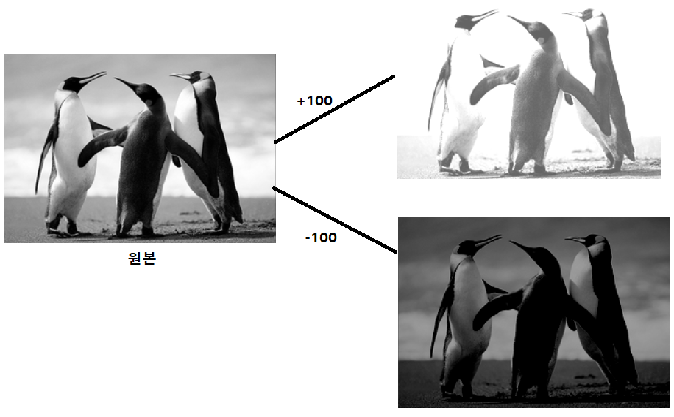
    
- **`cv2.add(src1, src2)`**
    - 밝기 조절이나 두 영상을 합치기에 사용할 수 있다.
    - src1: 첫번째 영상 또는 스칼라
    - src2: 두번째 영상 또는 스칼라
    - src2를 src1에 더한다.
- pixel에 스칼라 값을 더하거나 빼면 0 ~ 255의 범위를 넘어설 수 있다. ndarray의 type은 uint8(unsigned int8) 로 0 ~ 255범위를 넘어가는 숫자는 순환되어 버린다. 
    - 계산결과가 0이하가 되면 255로 부터 작아지게 되고 255가 넘어가면 0으로 가서 커지게 된다.
    - 그래서 cv2.add() 함수는 값이 순환되지 않도록 0이하의 값은 0으로 255이상의 값은 255가 되도록 처리한다. 이것을 **saturate연산**이라고 한다.

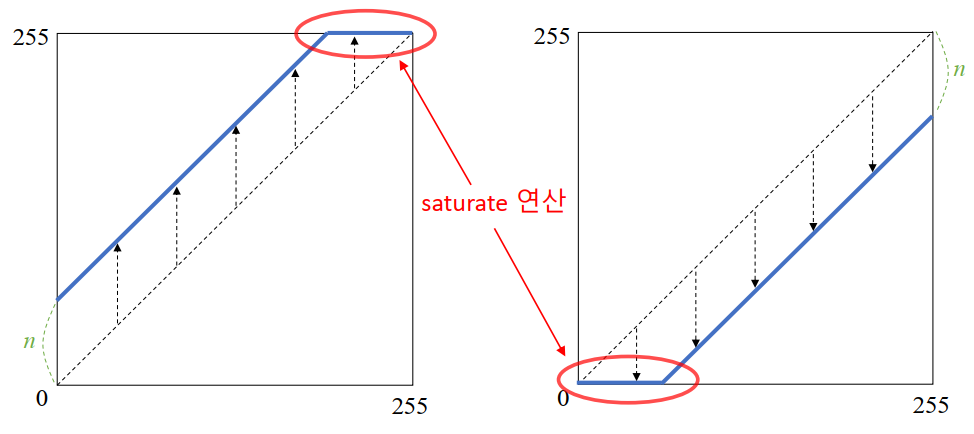

In [39]:
import cv2 
import numpy as np

img = cv2.imread("images/penguin.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.imread("images/penguin.jpg")
img.shape

(222, 296)

In [48]:
# 밝게 -> +
# img2 = img + 100
img2 = cv2.add(img, 100) # 더한 결과가 255가 넘거나 0보다 작게 되면 각각 255와 0에 맞춘다.
# 어둡게 -> -
# img3 = img - 100
img3 = cv2.add(img, -100)

cv2.imshow("f1", img)
cv2.imshow("f2", img2)
cv2.imshow("f3", img3)
cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
np.clip([-10, 100, 500], 0, 255)

array([  0, 100, 255])

In [46]:
img4 = np.clip(img + 100.0, 0, 255).astype('uint8')  #min, max을 지정해서 배열의 값을 min ~ max 범위로 맞춰준다.
cv2.imshow('f5', img4)
cv2.waitKey()
cv2.destroyAllWindows()

In [47]:
# -100
img5 = np.clip(img - 100.0, 0, 255).astype('uint8')
cv2.imshow('f6', img5)
cv2.waitKey()
cv2.destroyAllWindows()

# 명암비(Contrast) 조정

## 명암비/대비(Contrast)란
- 밝은 부분과 어두분 부분 사이의 밝기의 정도 차이
    - 영상이 전체적으로 밝은 픽셀들로만 구성되거나 어두운 픽셀들로만 구성되면 명암비가 낮다고 표현한다. 
    - 영상에 밝은 영역과 어두운 역역이 골고루 섞여있으면 명암비가 높다고 표현한다.
- 명암비가 낮으면 객체간의 구분이 되지 않아 흐릿한 느낌이 나고 명암비가 높으면 선명한 느낌이 든다.
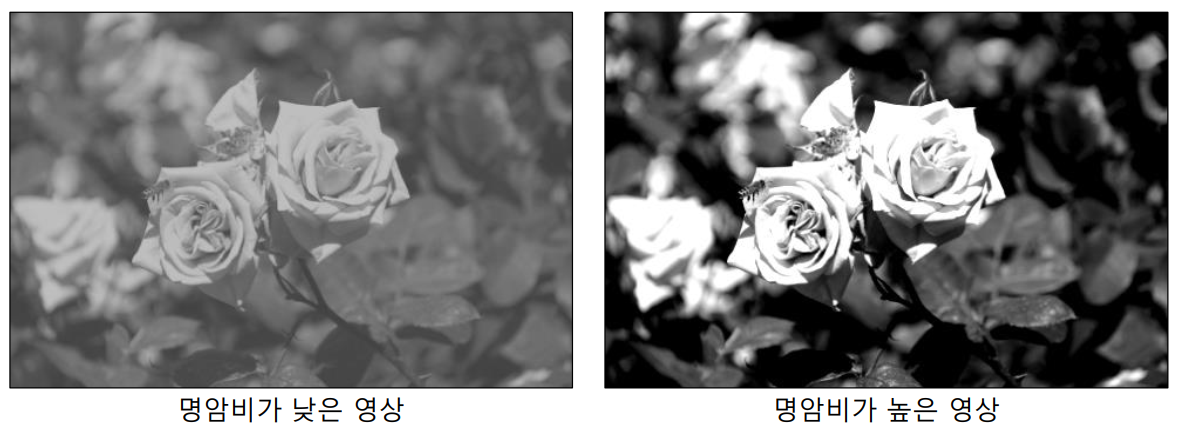

- 명암비를 변환하는 함수공식
$$
g(x, y)=f(x,y)+(f(x,y)-128) \alpha\\
==\\
(1+\alpha)f(x, y)-\alpha 128
$$

- $g$는 결과 image
- $f$는 원본 image
- $x$: x좌표
- $y$: y좌표
- $\alpha$: 대비를 조절하는 값. 
    - 0: 원본과 동일
    - 음수: 명암비를 낮춘다.
    - 양수: 명암비를 높인다.

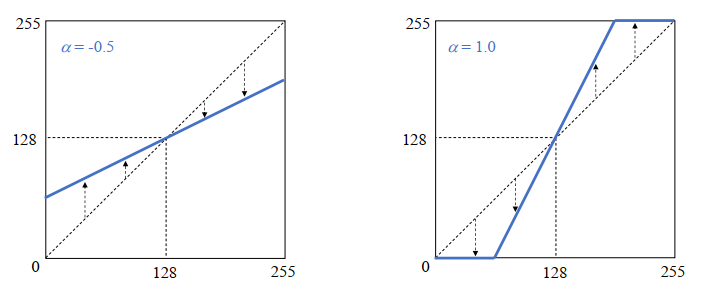

In [61]:
def change_contrast(img, alpha=0.0):
    """
    명암비(contrast)를 변환하는 함수.
    [parameter]
        img: ndarray - 명암비를 조절할 대상 이미지
        alpha: float - 대비 조절 비율값. 기본: 0.0 - 양수: 명암비를 높인다. 
                                                   음수: 명암비를 낮춘다. 0은 원본
    [return]
        ndarray - 명암비가 변환된 이미지
    """
    return np.clip((1.0 + alpha) * img - 128 * alpha, 0, 255).astype('uint8')

In [62]:
img = cv2.imread('images/rose.bmp', cv2.IMREAD_GRAYSCALE)
img2 = change_contrast(img, -0.5)  #명암비를 낮추기
img3 = change_contrast(img, 1) # 명암비를 높이기

In [65]:
cv2.imshow('original', img)
cv2.imshow('-0.5', img2)
cv2.imshow('1.0', img3)
cv2.waitKey()
cv2.destroyAllWindows()

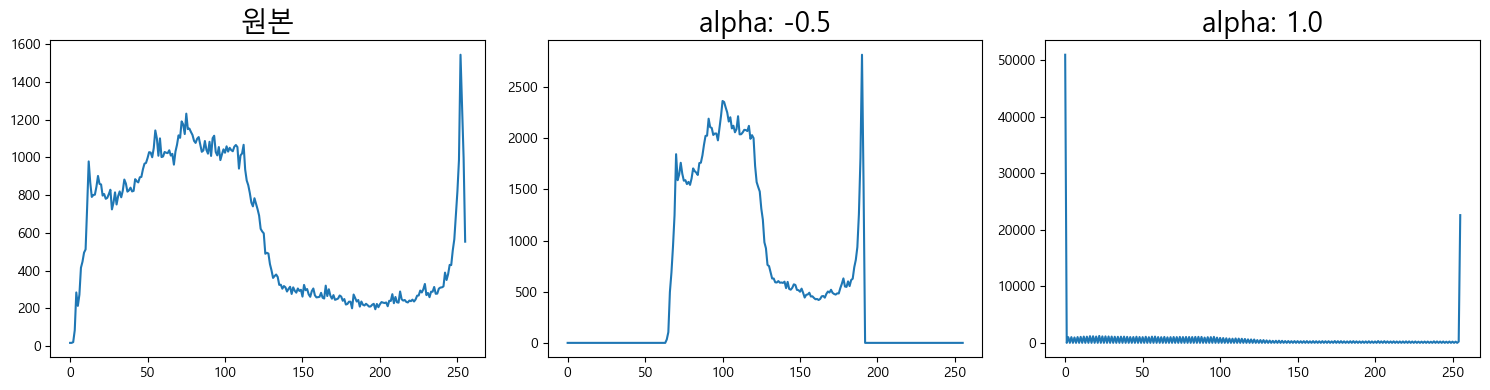

In [64]:
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(range(256), hist1)
plt.title('원본')

plt.subplot(1, 3, 2)
plt.plot(range(256), hist2)
plt.title("alpha: -0.5")

plt.subplot(1, 3, 3)
plt.plot(range(256), hist3)
plt.title("alpha: 1.0")
plt.tight_layout()
plt.show()

# 채도 (Saturation) 변환
- 채도: 색의 선명도를 말한다.
- 채도를 변환할 때는 HSV color 타입으로 변환한 뒤 S의 값을 바꾼다.
> HSV : 색상(Hue), 채도(Saturation), 명도(Value)

In [77]:
img = cv2.imread('images/lenna.bmp')
# color 영상의 채도나 명도(밝기)를 조절 -> HSV 색공간으로 변환후 처리하는 것이 편리.
img_low = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 채도는 낮출 원본 이미지.
img_high = img_low.copy()  # 채도를 높일 원본 이미지.

In [78]:
print(img[0,0,0], img_low[0,0,0])
img.shape, img_low.shape

125 4


((512, 512, 3), (512, 512, 3))

In [79]:
# 채도를 낮추기.
# img_low[:, :, 1] = cv2.add(img_low[:, :, 1], -50)
# 명암을 낮추기
img_low[:, :, 2] = cv2.add(img_low[:, :, 2], -50)

In [80]:
# 채도를 높이기.
# img_high[:, :, 1] = np.clip(img_high[:, :, 1] + 50.0, 0, 255).astype('uint8')
# 명암 높이기
img_high[:, :, 2] = np.clip(img_high[:, :, 2] + 50.0, 0, 255).astype('uint8')

In [82]:
cv2.imshow('ori', img)
cv2.imshow('low', cv2.cvtColor(img_low, cv2.COLOR_HSV2BGR))
cv2.imshow('high', cv2.cvtColor(img_high, cv2.COLOR_HSV2BGR))
cv2.waitKey()
cv2.destroyAllWindows()

# Filter 

## Filtering 개요
- 영상에서 필요한 정보만 통과시키고 필요없는 정보는 걸러내는 작업을 말한다.
- N x N행렬을 영상과 Convolution연산(Correlation연산)을 하여 처리한다.
    - 영상과 연산하는 N x N 행렬을 커널(Kernel), 마스크(Mask), 윈도우(Window)라고 한다.
    - Convolution연산
        - Filter를 영상을 이동하면서 같은 index의 값끼리 곱한뒤 다 더한다. 
        ![conv](figures/conv.gif)        
        
    - 최외곽처리는 바깥에 가상의 픽셀들이 있다고 생각하고 거기에 임의의 값을 채워 계산한다. 
        - 가상의 바깥픽셀을 **Padding**이라고 한다.
        - 바깥픽셀을 채우는 방법
            - BORDER_CONSTANT : 같은 값으로 채운다. 보통 0으로 채움   000|abcd|000
            - BORDER_REPLICATE: 외곽에 있는 값으로 채운다. aaa|abcd|ddd
            - BORDER_REFLECT: 거울에 반사되는 형식으로 채운다. cba|abcd|dcb
            - BORDER_REFLECT_101: (OpenCV 기본방식)BORDER_REFLECT와 같은 형식인데 가장 외곽의 값은 반사시키지 않는다. dcb|abcd|cba
    - N x N 행렬이 어떤 값을 가지고 있느냐에 따라 다양한 영상처리가 가능하다.
        - Bluring: 영상을 부드럽게 만들기
        - Shapening: 영상을 날카롭게 만들기
        - 엣지 검출
        - Noise 제거
    - 다양한 형태의 Kernel이 있으나 보통 3 x 3 행렬을 많이 쓴다.
    
    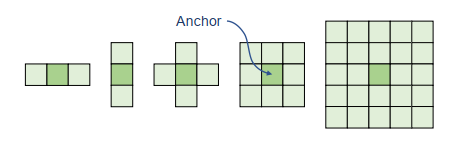
        
        - anchor(고정점): 영상에서 Filtering을 하려는 지점을 가리키는 필터의 중앙점을 사용한다.

## Blurring
- 영상을 흐릿/부드럽게 만드는 작업.
- 픽셀간의 값의 차이를 줄여서 날카로운 엣지가 무뎌지고 영상에 있는 Noise(잡음)이 사라지도록 하는 효과가 있다.
> 엣지(Edge): 물체간의 경계부분으로 contrast(대비)가 크다.

### 평균값 블러링(Average Blur)
- 주변 픽셀의 평균값을 합성곱하여 적용한다.
- 보통 3 x 3이나 5 x 5 필터를 많이 쓰며 필터의 크기가 커질수록 더 흐릿하게 변환된다.
- 영상이 뭉게져 세밀한 부분이 잘 안보이는 단점이 있다.

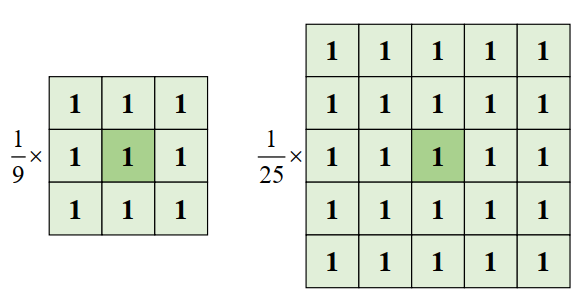
<center>필터 예</center>

- **`cv2.blur(src, ksize)`**
    - src: blur 처리할 입력영상
    - ksize: 필터의 크기. (width, height) 튜플로 지정

In [4]:
import cv2
img = cv2.imread('images/lenna.bmp')
img2 = cv2.blur(img, (3,3))
img3 = cv2.blur(img, (7,7))

In [5]:
cv2.imshow("ori", img)
cv2.imshow('3X3', img2)
cv2.imshow('7X7', img3)
cv2.waitKey()
cv2.destroyAllWindows()

In [87]:
img.shape, img2.shape, img3.shape

((512, 512, 3), (512, 512, 3), (512, 512, 3))

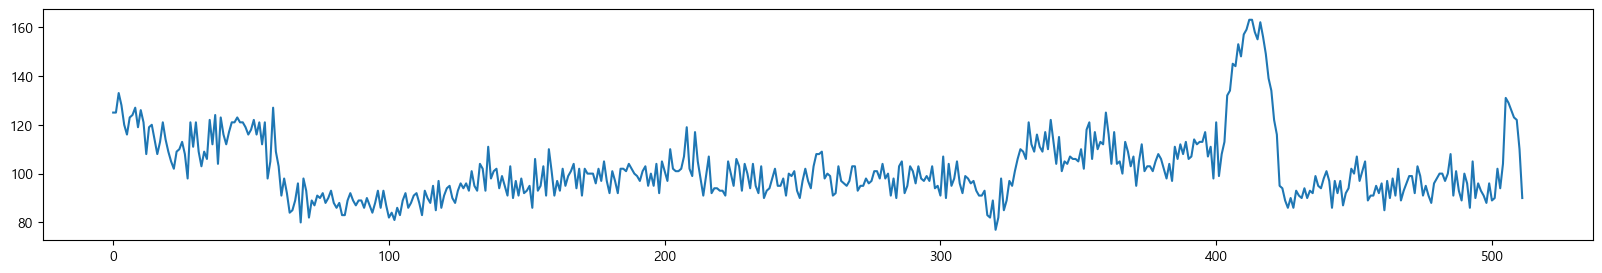

In [92]:
# 첫행의 blue
plt.figure(figsize=(20, 3))
plt.plot(img[0, :, 0])
plt.show()

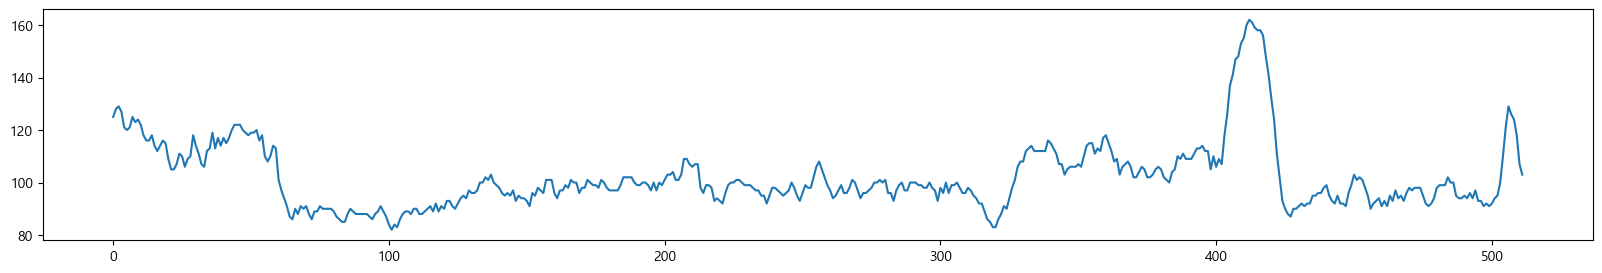

In [93]:
plt.figure(figsize=(20, 3))
plt.plot(img2[0, :, 0])  #3x3
plt.show()

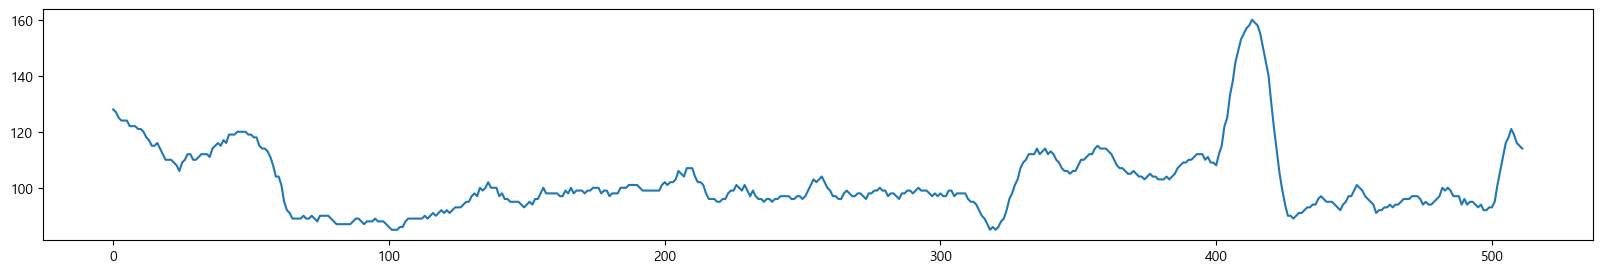

In [94]:
plt.figure(figsize=(20, 3))
plt.plot(img3[0, :, 0]) #7 X 7
plt.show()

In [101]:
# filter를 이용해서 conv 연산을 직접 처리하는 함수.
# filter 행렬을 직접 생성.
b_filter = np.ones((7,7)) / 49
b_filter

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

In [102]:
result = cv2.filter2D(img,  #대상이미지
                      -1,   #처리 결과의 data type - -1:대상이미지와 동일한 타입
                      b_filter # 필터 행렬
                     )

In [103]:
cv2.imshow("1", img3)
cv2.imshow("2", result)
cv2.waitKey()
cv2.destroyAllWindows()

### Gaussian Blur

- 대상 픽셀(Anchor)와 가까운 픽셀은 큰 가중치 멀리있는 픽셀은 작은 가중치를 사용해서 평균(가중평균)을 계산해서 필터링 한다.
    - Gaussian 분포(정규분포)의 확률밀도 함수를 사용해 필터에 들어갈 값들을 계산하여 대상픽셀을 기준으로 멀어질 수록 작은 값이 곱해지도록 한다. 
    - 평균은 0으로 하고 표준편차를 조정하여 흐림의 정도를 조절한다. 표준편차 값을 크게할 수록 흐려진다.
    - Filter의 shape은 $(8\sigma + 1,\;8\sigma + 1)$ 나 $(6\sigma + 1,\;6\sigma + 1)$ 으로 정해진다. $\sigma: 표준편차$
- Gaussian Blurring은 blur효과 뿐아니라 노이즈제거에도 많이 사용된다.

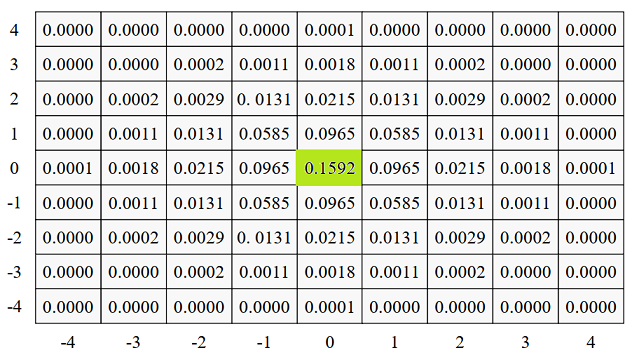

- **`cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)`**
    - src: blur를 적용할 영상. 
    - ksize: 커널크기. (0,0)으로 지정하면 sigma 값에 의해 결정된다. (보통 0,0 으로 설정)
    - sigamX: X축방향 sigma(표준편차) 값
    - sigamY: Y축방향 sigma(표준편차) 값. 생략하면 sigmaX와 같은 값 사용


In [13]:
img = cv2.imread('images/lenna.bmp')
g_blur = cv2.GaussianBlur(img,  #대상이미지
                          ksize=(0,0), #filter(kernal) size (0, 0) -> sigma값으로 filter크기를 결정
                          sigmaX=1)  # img: unit8 - (6*sigmaX + 1, 6*sigmaY + 1), float -(8*sigmaX + 1, 8*sigmaY + 1)
                                     #sigmaY 생략 -> sigmaX값을 이용

In [16]:
cv2.imshow("org", img)
cv2.imshow("mean blur(7X7)", img3)
cv2.imshow("gaussian(7X7)", g_blur)
cv2.waitKey()
cv2.destroyAllWindows()

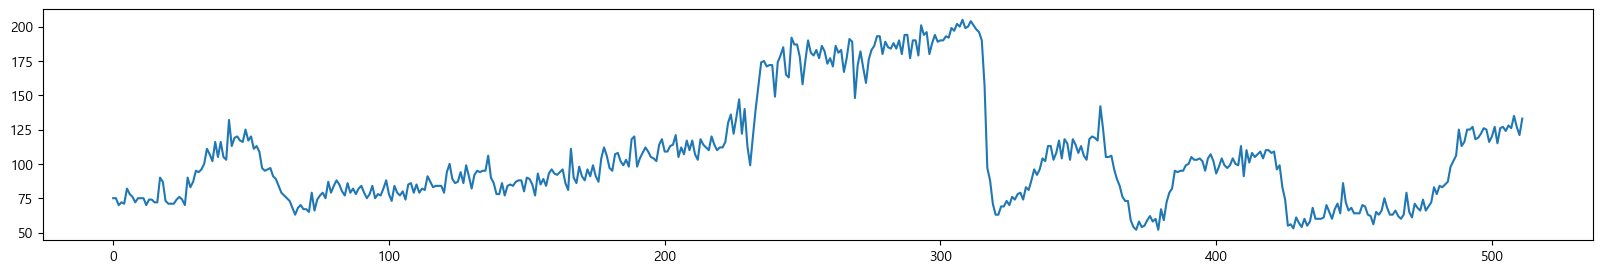

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot(img[100, :, 0])
plt.show()

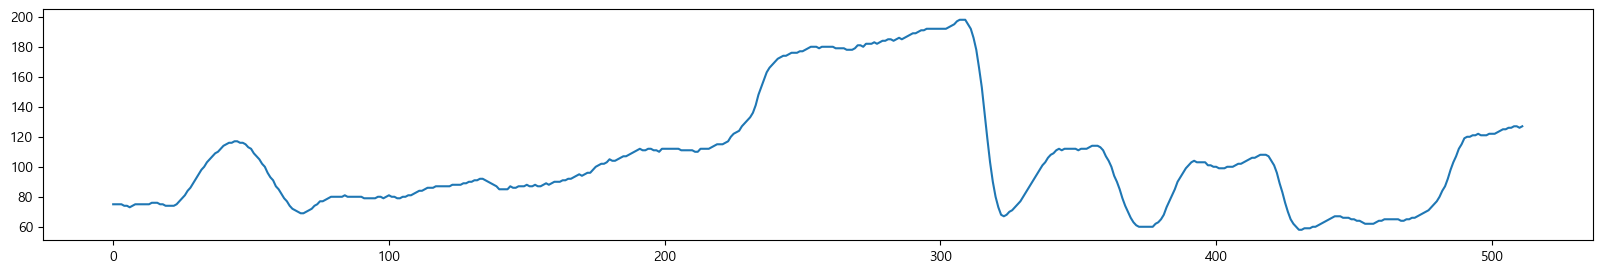

In [11]:
plt.figure(figsize=(20,3))
plt.plot(img3[100, :, 0]) # mean
plt.show()

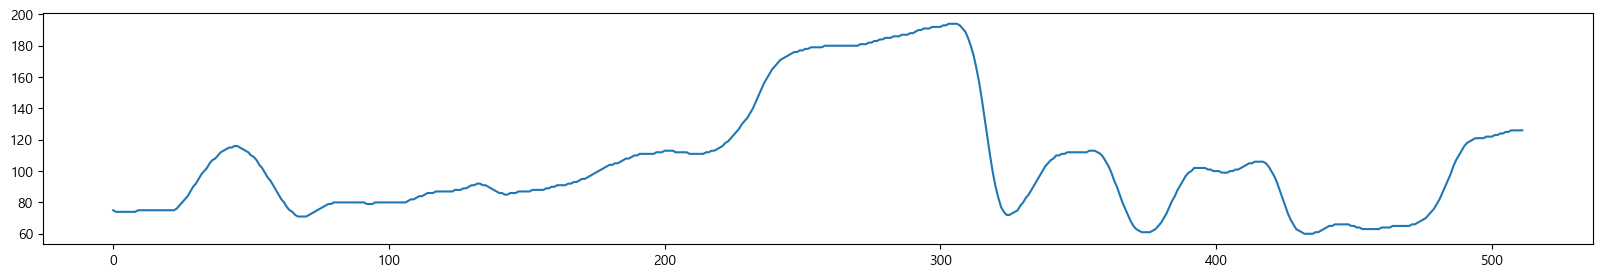

In [15]:
plt.figure(figsize=(20,3))
plt.plot(g_blur[100, :, 0])
plt.show()

### 잡음 제거
- `cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)`
    - 양방향 필터로 선명도는 유지하면서 bluring을 이용해 노이즈를 제거한다.
    - src: 잡음을 제거할 입력영상
    - d: 필터의 크기 지정. 음수(-1)을 입력하면 sigmaSpace값에 의해 자동 결정된다. 일반적으로 -1을 설정한다.
    - sigmaColor
        - 엣지인지 아닌지를 판단하는 기준값. 지정한 값보다 크면 엣지라고 생각하고 작으면 엣지가 아니라고 생각해 그 지점을 blurring 한다.
        - 이 값을 너무 크게 주면 엣지가 검출이 안되서 그냥 Gaussian Filter 사용하는 것과 같다.
    - sigmaSpace: Gaussian Filter에서 지정한 표준편차

In [19]:
result = cv2.bilateralFilter(img, 
                             d=-1, #필터 크기. -1: sigmaSpace를 기준으로 필터 크기 정의
                             sigmaColor=10, # anchor의 pixel과 지정한 값(5)의 차이보다 적은 pixcel만 평균을 낸다.
                             sigmaSpace=7 # 가우시안 필터의 sigmaX와 동일 (필터 크기)
                            )

In [21]:
cv2.imshow("org", img)
cv2.imshow('b_filter', result)
cv2.waitKey()
cv2.destroyAllWindows()

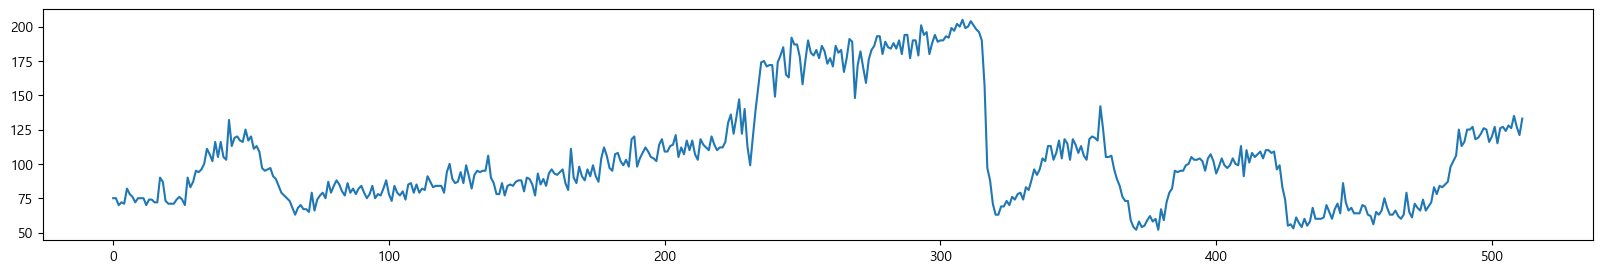

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot(img[100, :, 0])
plt.show()

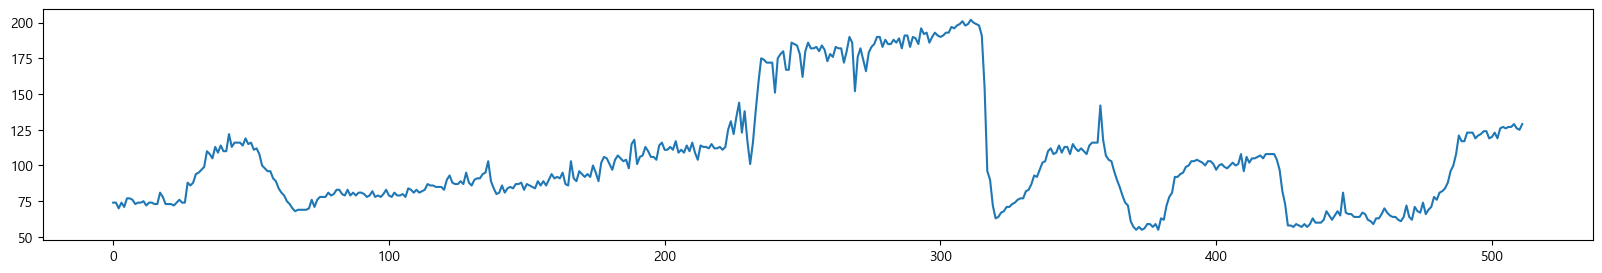

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot(result[100, :, 0])
plt.show()

## 샤프닝(Sharpen)
- Blurring의 반대로 흐린영상을 선명한 영상으로 만드는 작업.
- 이미지의 엣지(edge-사물의 윤곽부분)의 대비를 크게 만들어 준다.
    - 이미지 전체를 다 선명하게 하는 게 아니라 윤곽(edge)만 선명하게 만들어 명암비(contrast)를 크게해 선명하게 보이게 한다. 
- Unsharp mask(언샤프 마스크) 필터링
    - Unsharp한 영상을 이용해 Sharp한 영상을 만든다고 해서 Unsharp mask filtering 이라고 한다.
    - 원본 이미지에서 blurring 한 이미지를 뺀다음 그것을 원본이미지에 다시 더한다.
$$
h(x) = f(x)+\alpha(f(x)-\bar{f}(x))\\
f(x): 원본\;이미지\\
\bar{f}(x):\;원본\;이미지를\;blurring한\;이미지\\
\alpha: shappening\,정도\,조절값
$$

- 제공 함수는 없고 위 공식을 구현한다.

In [32]:
import numpy as np
def sharpen(img, alpha=1.0):
    """
    sharpen 처리 함수
    [parameter]
        img: ndarray - 대상 이미지
        alpha: float - shappen 조절값
    """
    # 1. blur -> gaussian blur
    blur = cv2.GaussianBlur(img, (0,0), 3)
    # 2 shappen 처리 -> 원본 + (원본 - 블러) * 알파
    sharp = np.clip(img + (img.astype('float64') - blur) * alpha, 0, 255).astype('uint8')
#     sharp = cv2.addWeighted(img, (1+alpah), blur, -alpha)
    return sharp

In [33]:
# 원본 + (원본 - 블러) * 알파
# 원본 + 원본*알파 - 블러*알파

# 원본*(1+알파) - 블러*알파

In [34]:
# cv2.addWeighted(a, b, c, d)  # a*b +  c*d

In [37]:
sharpen1 = sharpen(img, 2.0)  # 원본 sharppen
sharpen2 = sharpen(img3, 2.0) # 평균값필터 7x7 적용한 것

In [38]:
cv2.imshow('ori', img)
cv2.imshow('blur (7x7 mean blur)', img3)
cv2.imshow("s1-org", sharpen1)
cv2.imshow("s2-7x7", sharpen2)
cv2.waitKey()
cv2.destroyAllWindows()